### Web crawling:


Choose any Nepali online news
website and crawl all the links and hyperlinks within the website. Based on the
links and hyperlinks, conclude that the website is a “hub” or an “authority”.
Please consider repeated counts of the same link/hyperlink just as one
hyperlink.

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin

In [2]:
# initialize the set of links (unique links)
internal_urls = set()
external_urls = set()

def is_valid_url(url):
    """
    Checks whether `url` is a valid URL.
    """
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

In [3]:
def get_all_webpage_link(url):
    """
    Returns all URLs that is found on `url` in which it belongs to the same website
    """
    # all URLs of `url`
    urls = set()
    # domain name of the URL without the protocol
    domain_name = urlparse(url).netloc[4:]
    # domain_name = 'ekantipur.com'
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    for a_tag in soup.findAll("a"):
        href = a_tag.attrs.get("href")
        if href == "" or href is None:
            # href empty tag
            continue
        # join the URL if it's relative (not absolute link)
        href = urljoin(url, href)
        parsed_href = urlparse(href)
        # remove URL GET parameters, URL fragments, etc.
        href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path
        if not is_valid_url(href):
            # not a valid URL
            continue
        if href in internal_urls:
            # already in the set
            continue
        if domain_name not in href:
            # external link
            # import ipdb;ipdb.set_trace()
            if href not in external_urls:
                print(f"[!] External link: {href}")
                external_urls.add(href)
            continue
        print(f"[*] Internal link: {href}")
        urls.add(href)
        internal_urls.add(href)
    return urls

In [4]:
total_urls_visited = 0

def crawl(url, max_urls=30):
    """
    Crawls a web page and extracts all links.
    You'll find all links in `external_urls` and `internal_urls` global set variables.
    params:
        max_urls (int): number of max urls to crawl, default is 30.
    """
    global total_urls_visited
    total_urls_visited += 1
    print(f"[*] Crawling: {url}")
    links = get_all_webpage_link(url)
    for link in links:
        if total_urls_visited > max_urls:
            break
        crawl(link, max_urls=max_urls)
    
if __name__ == "__main__":
    crawl("https://www.ekantipur.com")
    print("[+] Total Internal links:", len(internal_urls))
    print("[+] Total External links:", len(external_urls))
    print("[+] Total URLs:", len(external_urls) + len(internal_urls))

[*] Crawling: https://www.ekantipur.com
[*] Internal link: https://www.ekantipur.com/search/2022
[*] Internal link: https://www.ekantipur.com/
[*] Internal link: https://ekantipur.com/news
[*] Internal link: https://ekantipur.com/business
[*] Internal link: https://ekantipur.com/opinion
[*] Internal link: https://ekantipur.com/sports
[*] Internal link: https://ekantipur.com/national
[*] Internal link: https://ekantipur.com/koseli
[*] Internal link: https://ekantipur.com/world
[*] Internal link: https://ekantipur.com/entertainment
[*] Internal link: https://ekantipur.com/blog
[*] Internal link: https://ekantipur.com/diaspora
[*] Internal link: https://ekantipur.com/feature
[*] Internal link: https://ekantipur.com/photo_feature
[*] Internal link: https://ekantipur.com/lifestyle
[*] Internal link: https://ekantipur.com/literature
[*] Internal link: https://ekantipur.com/technology
[*] Internal link: https://ekantipur.com/health
[*] Internal link: https://ekantipur.com/video
[*] Internal l

[*] Internal link: https://ekantipur.com/search/2022
[!] External link: https://www.ncell.axiata.com/en/individual/offers/non-stop-time-pack
[!] External link: https://www.khukrirum.com/
[!] External link: https://www.islington.edu.np/
[!] External link: https://bit.ly/Bajajinterestcampaign
[!] External link: https://bit.ly/33R9mZL
[!] External link: https://www.qatarairways.com/en-np/offers/love-is-in-the-air.html
[!] External link: https://www.facebook.com/slsbry
[!] External link: https://www.laxmibank.com/deposit/fixed-deposit/
[!] External link: https://esewaremit.com/
[!] External link: http://www.maruticements.com/
[!] External link: http://www.nepatop.com.np/
[!] External link: https://click.daraz.com.np/e/_6yzFg
[!] External link: https://www.daraz.com.np/
[!] External link: https://click.daraz.com.np/e/_6uh2I
[!] External link: https://click.daraz.com.np/e/_6GVDG
[!] External link: https://connectips.com/knowmore/gov/
[!] External link: https://www.civilbank.com.np/
[!] Exter

[*] Internal link: https://radiokantipur.com/national/2022/02/17/1645097927
[*] Internal link: https://radiokantipur.com/national/2022/02/17/1645097836
[*] Internal link: https://radiokantipur.com/national/2022/02/16/1645020468
[*] Internal link: https://radiokantipur.com/national/2022/02/16/1645020382
[*] Internal link: https://radiokantipur.com/national/2022/02/16/1645020110
[*] Internal link: https://radiokantipur.com/national/2022/02/16/1645019990
[*] Internal link: https://radiokantipur.com/national/2022/02/16/1645009694
[*] Internal link: https://radiokantipur.com/national/2022/02/16/1644983602
[*] Internal link: https://radiokantipur.com/national/2022/02/15/1644928016
[*] Internal link: https://radiokantipur.com/national/2022/02/15/1644927127
[*] Internal link: https://radiokantipur.com/national/2022/02/15/1644897938
[*] Internal link: https://radiokantipur.com/national/2022/02/14/1644857989
[*] Internal link: https://radiokantipur.com/national/2022/02/14/1644857675
[*] Internal

### Total Internal and External Links Count

In [5]:
print("[+] Total Internal links:", len(internal_urls))
print("[+] Total External links:", len(external_urls))
print("[+] Total URLs:", len(external_urls) + len(internal_urls))

[+] Total Internal links: 539
[+] Total External links: 56
[+] Total URLs: 595


### Analysis
Based on the ...

### Web scraping

Choose one of the genres “समाचार", “बिचार/ब्लग", “मनोरञ्जन", “बिजनेस", “खेलकुद" etc. and scrap
data from 5 Nepali online news websites for the last six months. Remove Nepali
stopwords from the scrapped text. Compute the term frequencies of the top
twenty terms/words in each of these genres and display the information in the
form of a graph.

### Here, we have identified the "technology" section's link of 5 online news portals.

In [6]:
ekantipur_url = 'https://ekantipur.com/technology'
onlinekhabar_url = 'https://www.onlinekhabar.com/content/business/technology'
ratopati_url = 'https://www.ratopati.com/category/knowledge-science'
setopati_url = 'https://www.setopati.com/kinmel/information-technology/'
reportersnepal_url = 'https://www.reportersnepal.com/category/technology'

In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
def write_file(line):
    file_object = open('corpus.txt', 'a')
    file_object.write(line.get_text())
    file_object.close()

In [9]:
for each in BeautifulSoup(requests.get(ekantipur_url).text, 'html.parser').find_all('p'):
    write_file(each)

In [10]:
for each in BeautifulSoup(requests.get(onlinekhabar_url).text, 'html.parser').find_all('h2'):
    write_file(each)

In [11]:
for each in BeautifulSoup(requests.get(ratopati_url).text, 'html.parser').find_all('p'):
    write_file(each)

In [12]:
for each in BeautifulSoup(requests.get(reportersnepal_url).text, 'html.parser').find_all('p'):
    write_file(each)

In [13]:
for each in BeautifulSoup(requests.get(setopati_url).text, 'html.parser').find_all("span", class_="main-title"):
    write_file(each)

### Analysing the words

In [41]:
from collections import Counter, OrderedDict
word_list = open("corpus.txt", "r").read().split()
word_dict = Counter(word_list)

In [42]:
stop_word_list = open("stopwords.txt", "r").read().split()
stop_word_dict = Counter(stop_word_list)

In [65]:
c = {k:v for k,v in word_dict.items() if k not in stop_word_dict}
top_counts = Counter(c).most_common()[:22]
top_counts

[('।', 110),
 ('अन्तरिक्ष', 12),
 ('कम्पनी', 11),
 ('नेपाल', 11),
 ('सन्', 10),
 ('तथा', 10),
 ('गर्नुहोस्', 9),
 ('स्पेस', 9),
 ('प्रक्षेपण', 8),
 ('गर्ने', 8),
 ('मस्कको', 7),
 ('एउटा', 7),
 ('हुन्', 7),
 ('हुने', 7),
 (':', 7),
 ('परीक्षण', 7),
 ('वर्ष', 6),
 ('अमेरिकी', 6),
 ('सबैभन्दा', 6),
 ('मोबाइल', 6),
 ('प्रकाशित', 5),
 ('वर्षको', 5)]

Minor cleaning

In [66]:
top_counts.pop(0)
top_counts.pop(13)

(':', 7)

In [67]:
top_counts

[('अन्तरिक्ष', 12),
 ('कम्पनी', 11),
 ('नेपाल', 11),
 ('सन्', 10),
 ('तथा', 10),
 ('गर्नुहोस्', 9),
 ('स्पेस', 9),
 ('प्रक्षेपण', 8),
 ('गर्ने', 8),
 ('मस्कको', 7),
 ('एउटा', 7),
 ('हुन्', 7),
 ('हुने', 7),
 ('परीक्षण', 7),
 ('वर्ष', 6),
 ('अमेरिकी', 6),
 ('सबैभन्दा', 6),
 ('मोबाइल', 6),
 ('प्रकाशित', 5),
 ('वर्षको', 5)]

## Plotting the top 20 words

/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/akash/.virtualenvs/datascience/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2340 (\N{DEVANAGARI L

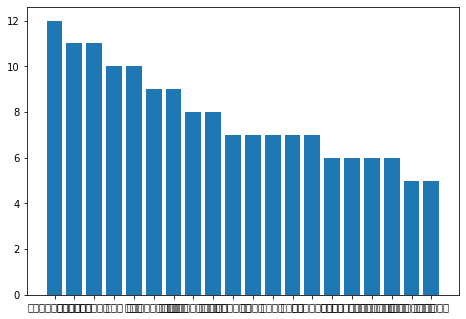

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis, y_axis = [], []
for each in top_counts:
    x_axis.append(each[0])
    y_axis.append(each[1])
langs = x_axis
students = y_axis
ax.bar(langs,students)
plt.show()